In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
import warnings


In [2]:
# load in data
train_id = pd.read_csv('train_identity.csv')
train_tr = pd.read_csv('train_transaction.csv')

In [3]:
test_id = pd.read_csv('test_identity.csv')
test_tr = pd.read_csv('test_transaction.csv')

C:\Users\roland\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


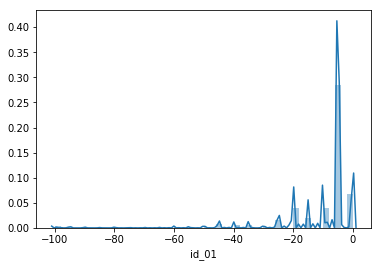

In [4]:
sns.distplot(train_id['id_01'])

In [5]:
# its needed as this dataset cripples my computer
# not sure who wrote this function otherwise I'd give credit
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df


In [6]:
train=pd.merge(train_tr ,train_id,how="left",on="TransactionID")
test=pd.merge(test_tr,test_id,how="left",on="TransactionID")

train=reduce_mem_usage(train)
test=reduce_mem_usage(test)

# remove old variables to save memory
del train_id
del test_id
del train_tr
del test_tr

Mem. usage decreased to 650.48 Mb (66.8% reduction)
Mem. usage decreased to 565.37 Mb (66.3% reduction)


In [7]:
for col in train.columns:
    if train[col].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[col].values) + list(test[col].values))
        train[col] = lbl.transform(list(train[col].values))
        test[col] = lbl.transform(list(test[col].values))

def clean_inf_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)

# replace all nan,inf,-inf to nan so it will be easy to replace
train = clean_inf_nan(train)
test = clean_inf_nan(test)
for i in train.columns:
    train[i].fillna(train[i].median(),inplace=True) # fill with median because mean may be affect by outliers.

for i in test.columns:
    test[i].fillna(test[i].median(),inplace=True)

X = train.drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
y = train['isFraud']
X_test = test.drop(['TransactionDT', 'TransactionID'], axis=1)
test = test[['TransactionID']]


In [8]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
clf=LogisticRegressionCV(cv=5, random_state=0).fit(X, y)
train_res=clf.predict_proba(X)
test_res=clf.predict_proba(X_test)
train_res=pd.DataFrame(train_res)
train_val = pd.concat([X, train_res.iloc[0:train_res.shape[0],1]], axis=1)
train_val=pd.concat([train_val,y],axis=1)
test_res=pd.DataFrame(test_res)
test_val=pd.concat([X_test,test_res.iloc[0:test_res.shape[0],1]],axis=1)

C:\Users\roland\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\roland\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\roland\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\roland\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\roland\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Conve

C:\Users\roland\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\roland\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\roland\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\roland\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\roland\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Conve

In [10]:
submission=pd.DataFrame()
submission=test
submission['isFraud']=test_val[1]

# display 10 for fun
submission.head(10)

,TransactionID,isFraud
0,3663549,0.005462
1,3663550,0.006876
2,3663551,0.021016
3,3663552,0.019193
4,3663553,0.031668
5,3663554,0.035275
6,3663555,0.036342
7,3663556,0.023740
8,3663557,0.006188
9,3663558,0.027403


In [11]:
submission.to_csv("resultsFinal.csv")